*Арешин Станислав Олегович М8О-404Б-17*

**Лабораторная работа №7 по курсу Численные методы**

*Москва 2020*

# Постановка задачи

**Вариант 1**

*Уравнение:*

$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}=0$$

$$u(0,y) = y$$

$$u(1,y)=1 + y$$

$$u(x,0)=x$$

$$u(x,1)=1 + x$$

*Аналитическое решение:*

$$U(x,y) = x + y$$

Решить краевую задачу для дифференциального уравнения эллиптического типа. Аппроксимацию уравнения произвести с использованием центрально-разностной схемы. Для решения дискретного аналога применить следующие методы: метод простых итераций (метод Либмана), метод Зейделя, метод простых итераций с верхней релаксацией. Вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,y)$ . Исследовать зависимость погрешности от сеточных параметров  $h_x, h_y$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# аналитическое решение
def U(x, y):
    return x + y 

In [3]:
def u0j(y, j):
    return y[j]

def ui0(x, i):
    return x[i]

def uNj(y, j):
    return 1 + y[j] 

def uiN(x, i):
    return 1 + x[i] 

# Реализация

* Метод простых итераций:

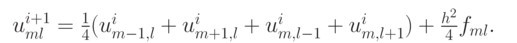

* Метод Зейделя:

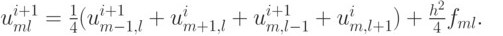

* Метод Релаксации:

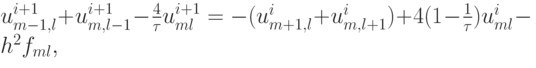

In [4]:
def eleptic_solver(N, l=0, r=1, eps=0.01, method=1, p=1.5, u0j=u0j, ui0 = ui0, uNj = uNj, uiN = uiN):
    h = (r - l) / N
    
    x = [l + i * h for i in range(N + 1)]
    y = [l + i * h for i in range(N + 1)]
        
    u = []
    
    row_x = []
    for i in range(N):
        row_y = [0] * (N + 1)
        row_y[N] = uiN(x, i)
        row_x.append(row_y)
        
    row_y = []
    for j in range(N + 1):
        row_y.append(uNj(y, j))
    row_x.append(row_y)
        
    for i in range(1, N):
        for j in range(1, N):
            row_x[i][j] = (r - x[i]) * uNj(y, j) / (r - x[i] + r - y[j]) \
            + (r - y[j]) * uiN(x, i) / (r - x[i] + r - y[j]) 
    for i in range(N):
        row_x[i][0] = ui0(x, i)
        row_x[0][i] = u0j(y, i)
    u.append(row_x)
    prev = row_x.copy()
                                                    
    k = 0
    e = eps * 2
    while e > eps:
        row_x = np.array([[0.] * (N + 1)] * (N + 1))
        for i in range(N):
            row_x[i][N] = uiN(x, i)
            row_x[N][i]  = uNj(y, i)
        row_x[N][N] = uNj(y, N)

        # метод простых итераций
        if method == 1:
            for i in range(1, N):
                for j in range(1, N):
                    row_x[i][j] = (u[k][i + 1][j] + u[k][i - 1][j] +\
                                   u[k][i][j + 1] + u[k][i][j - 1]) / 4
        # метод зейделя
        elif method == 2:
            for i in range(1, N):
                for j in range(1, N):
                    row_x[i][j] = (u[k][i + 1][j] + row_x[i - 1][j] +\
                                   u[k][i][j + 1] + row_x[i][j - 1]) / 4
        # метод релаксации                                                 
        elif method == 3:
            for i in range(1, N):
                for j in range(1, N):
                    row_x[i][j] = u[k][i + 1][j] + u[k][i][j + 1] +\
                                    row_x[i - 1][j] + row_x[i][j - 1] - \
                                    4 * (1- 1/p) * u[k][i][j]
                    row_x[i][j] = row_x[i][j] * p / 4
                        
        for i in range(N):
            row_x[i][0] = ui0(x, i)
            row_x[0][i] = u0j(x, i)
        u.append(row_x)
         
        e = np.max(np.array(u[k + 1]) - np.array(u[k]))
        k += 1
    res = u[k]
    return x, y, res, k, e

# Отрисовка графиков

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from mpl_toolkits.mplot3d import Axes3D

In [6]:
def calc_U_xy(U, lx, rx, ly, ry, dx, dy):
        xs = np.arange(lx, rx + dx, dx)
        ys = np.arange(ly, ry + dy, dy)
        U_ = []

        for x_ in xs:
            row = []
            for y_ in ys:
                row.append(U(x_, y_))
            U_.append(row)
        return xs, ys, U_

In [7]:
def plot_solution(x, y, u, U, lx, rx, ly, ry):
        fig = plt.figure(figsize=(10, 10))
        ax = Axes3D(fig)
    
        dx = (rx - lx) / 1000
        dy = (ry - ly) / 1000
        xarr, yarr, Ulist = calc_U_xy(U, lx, rx, ly, ry, dx, dy)
        ax.plot_surface(np.array(xarr), np.array(yarr), np.array(Ulist))
        ax.plot_wireframe(x, y, u, color="black")
        ax.set(xlabel='$x$', ylabel='$y$', zlabel='$U$')
        fig.tight_layout()

In [8]:
 def errors_x(x, y, u, U):
        eps = []
        for i, x_ in enumerate(x):
            s = 0
            for j, y_ in enumerate(y):
                s += (U(x_, y_) - u[j][i]) ** 2
            eps.append(s ** 0.5)
        return eps
    
def errors_y(x, y, u, U):
    eps = []
    for i, y_ in enumerate(y):
        s = 0
        for j, x_ in enumerate(x):
            s += (U(x_, y_) - u[i][j]) ** 2
        eps.append(s ** 0.5)
    return eps

In [9]:
def plot_errors_xy(x, y, u, U):
        plt.figure(figsize=(14,7))
        plt.plot(x, errors_x(x, y, u, U))
        plt.plot(y, errors_y(y, x, u, U))
        plt.legend(["Ошибка по x", "Ошибка по y"])
        plt.grid(color = 'blue', linestyle = '--')
        plt.show() 

# Метод простых итераций

In [10]:
x, y, u, k, e = eleptic_solver(4)
print("Кол-во итераций: {}".format(k))
print("Эпсилон: {}".format(e))

Кол-во итераций: 2
Эпсилон: 0.0


D:\conda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # This is added back by InteractiveShellApp.init_path()


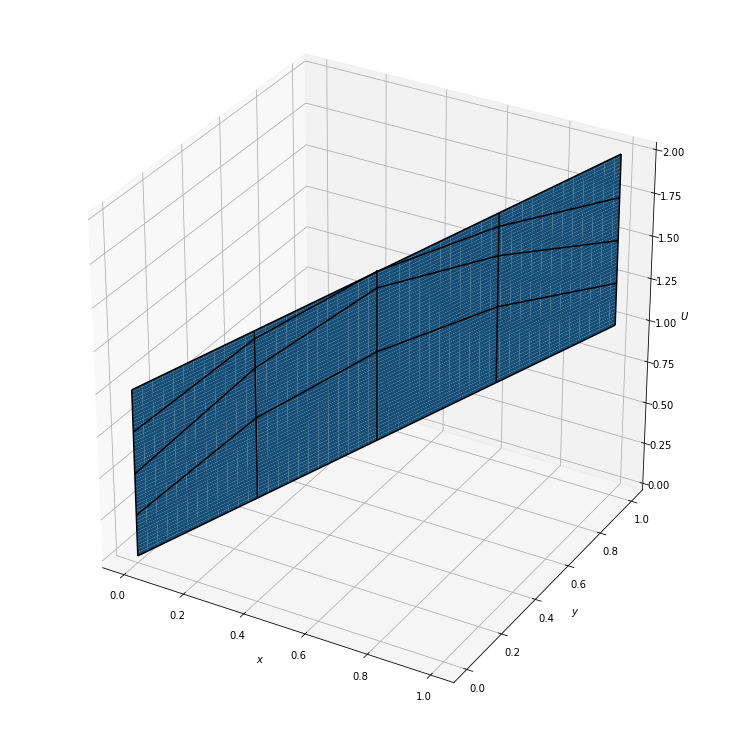

In [11]:
plot_solution(x, y, u, U, 0, 1, 0, 1)

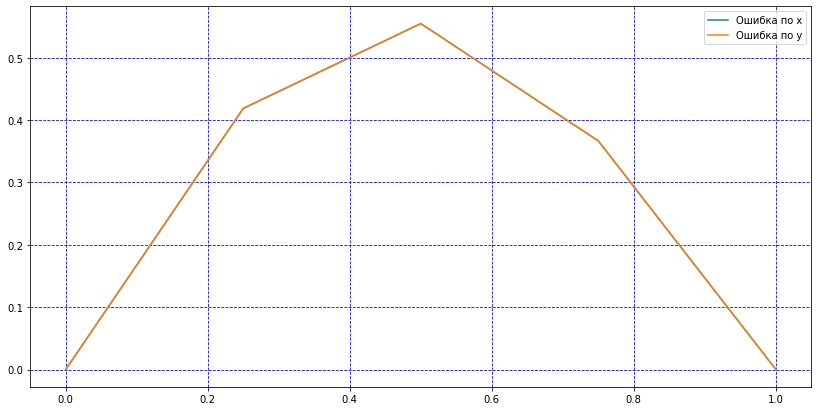

In [12]:
plot_errors_xy(x, y, u, U)

# Метод Зейделя

In [13]:
x, y, u, k, e = eleptic_solver(4, method=2)
print("Кол-во итераций: {}".format(k))
print("Эпсилон: {}".format(e))

Кол-во итераций: 1
Эпсилон: 0.0


D:\conda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # This is added back by InteractiveShellApp.init_path()


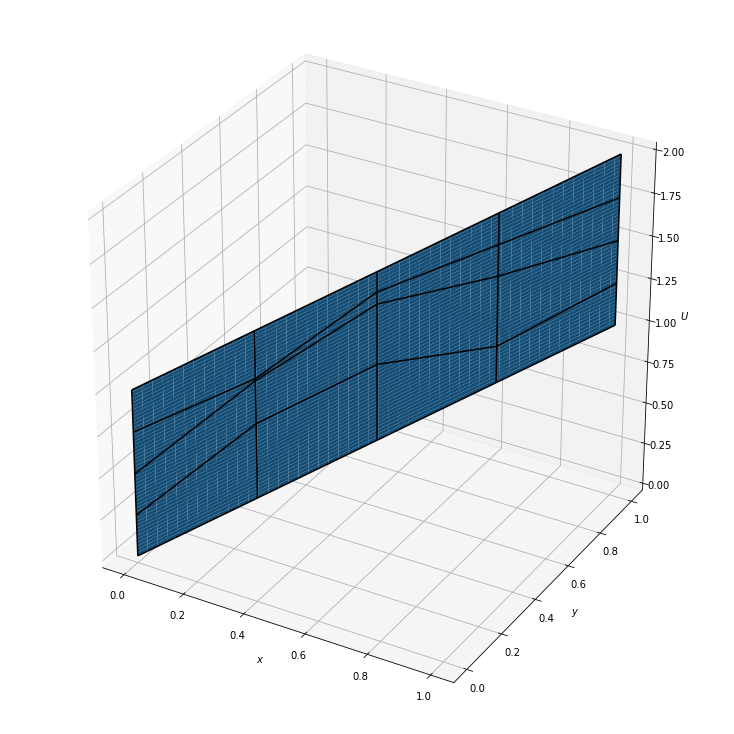

In [14]:
plot_solution(x, y, u, U, 0, 1, 0, 1)

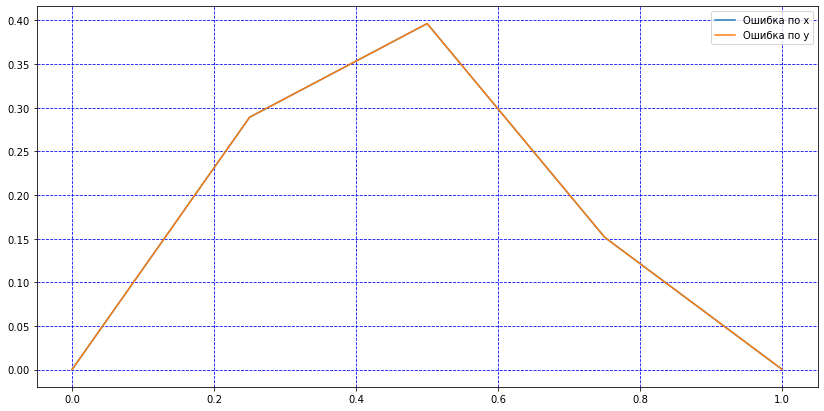

In [15]:
plot_errors_xy(x, y, u, U)

# Метод релаксации

In [16]:
x, y, u, k, e = eleptic_solver(4, method=3, p =1.2)
print("Кол-во итераций: {}".format(k))
print("Эпсилон: {}".format(e))

Кол-во итераций: 1
Эпсилон: 0.0


D:\conda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # This is added back by InteractiveShellApp.init_path()


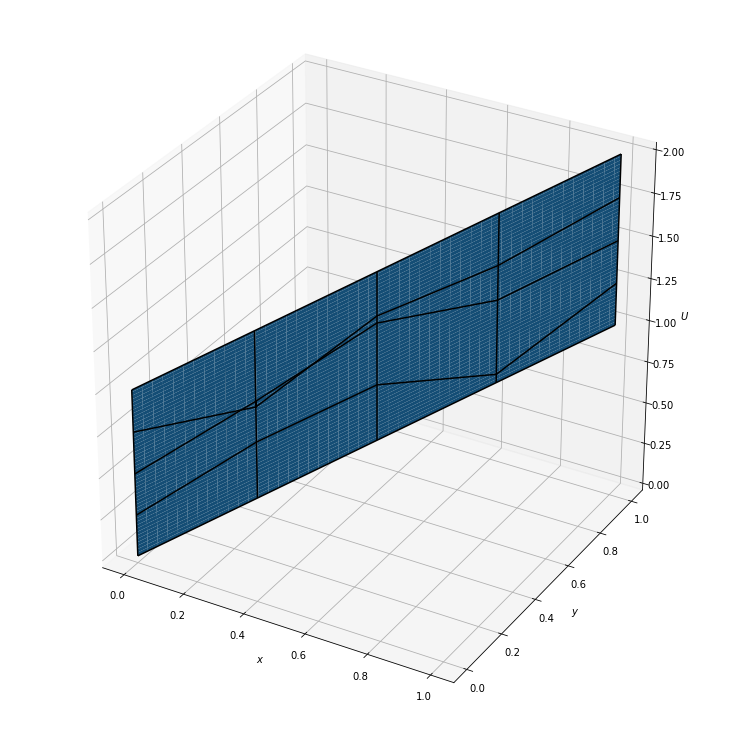

In [17]:
plot_solution(x, y, u, U, 0, 1, 0, 1)

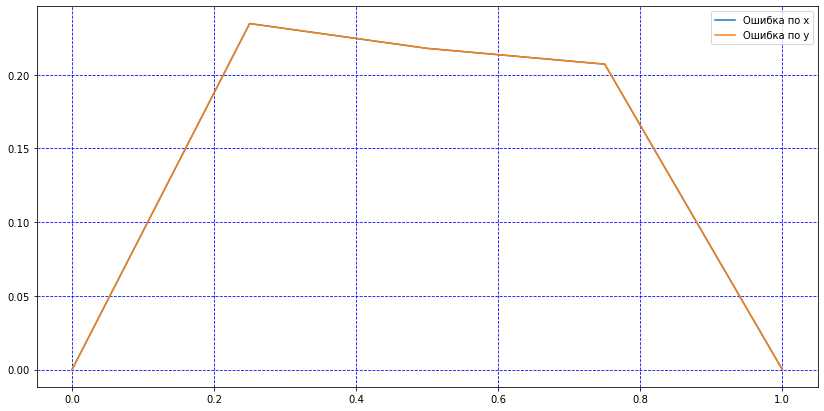

In [18]:
plot_errors_xy(x, y, u, U)

# Вывод

В ходе выполнения лабораторной работы были освоены три итерационных метода для решения краевой задачи для дифференциального уравнения эллиптического типа : метод простых итераций, метод Зейделя и метод релаксации.

Наилучший результат по погрешности сеточных параметров  $h_x, h_y$ получился при решении методом релаксации, затем метод Зейделя и хуже всех сработал метод простых иттераций. В таком же порядке можно отсортировать методы по количеству итераций для поиска решения: меньше всех у метода релаксации, затем метод Зейделя и метод простых итераций. В моём варианте уравнение простое и по факту мы получаем решение практически сразу после линейной интерполяции, но если вместо линейной интерполяции использовать другую (или например просто задать другие начальные значения), то можно нагляднее оценить количество итераций методов.